# Lecture 16: Projection Matrices and Least Squares

Reference    
Lecture video: https://www.youtube.com/watch?v=osh80YCg_GM            
Chinese note: https://nbviewer.jupyter.org/github/zlotus/notes-linear-algebra/blob/master/chapter16.ipynb  

In the last lecture, we learned the projection matrix $P=A\left(A^{T} A\right)^{-1} A^{T}$, $Pb$ will project vector $b$ onto the column space of matrix $A$. 

Here are two special caes:
* If $b\in\operatorname{C}(A)$, then $P = I, Pb = b$
* If $b\perp\operatorname{C}(A)$, then $Pb = 0$

Generally, $b$ will have a part that perpendicular to $A$'s column space and a part that is in $A$'s column space. The projection is to "kill" the perpendicular part and preserve the part in the column space. 

If $b \in \operatorname{C}(A)$, then $b = Ax$, thus:

$$p=P b=A\left(A^{T} A\right)^{-1} A^{T} A x=A x=b$$

If  $b\perp\operatorname{C}(A)$, then $b\in \operatorname{N}(A^{\top}), A^{\top}b=0$, thus:

$$
p=P b=A\left(A^{T} A\right)^{-1} A^{T} b=0
$$

When $b$ is projected, $b = e+p, p = Pb, e=(I-P)b$, here $p$ is the part of $b$ that in the column space of $A$, $e$ is the part of $b$ that is in the left null space of $A$. 

Let's go back to the example we mentioned at the end of last lecture. We want to find the line $y = C+Dt$ that has the least error to three points (1, 1)(2, 2)(3, 2). 

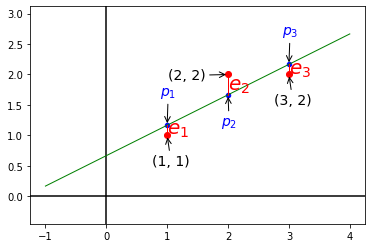

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import pandas as pd
import seaborn as sns

x = np.array([1, 2, 3]).reshape((-1,1))
y = np.array([1, 2, 2]).reshape((-1,1))
predict_line = np.array([-1, 4]).reshape((-1,1))

regr = linear_model.LinearRegression()
regr.fit(x, y)
ey = regr.predict(x)

fig = plt.figure()
plt.axis('equal')
plt.axhline(y=0, c='black')
plt.axvline(x=0, c='black')

plt.scatter(x, y, c='r')
plt.scatter(x, regr.predict(x), s=20, c='b')
plt.plot(predict_line, regr.predict(predict_line), c='g', lw='1')
[ plt.plot([x[i], x[i]], [y[i], ey[i]], 'r', lw='1') for i in range(len(x))]

plt.annotate('(1, 1)', xy=(1, 1), xytext=(-15, -30), textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))
plt.annotate('(2, 2)', xy=(2, 2), xytext=(-60, -5), textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))
plt.annotate('(3, 2)', xy=(3, 2), xytext=(-15, -30), textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))

plt.annotate('$e_1$', color='r', xy=(1, 1), xytext=(0, 2), textcoords='offset points', size=20)
plt.annotate('$e_2$', color='r', xy=(2, 2), xytext=(0, -15), textcoords='offset points', size=20)
plt.annotate('$e_3$', color='r', xy=(3, 2), xytext=(0, 1), textcoords='offset points', size=20)

plt.annotate('$p_1$', xy=(1, 7/6), color='b', xytext=(-7, 30), textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))
plt.annotate('$p_2$', xy=(2, 5/3), color='b', xytext=(-7, -30), textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))
plt.annotate('$p_3$', xy=(3, 13/6), color='b', xytext=(-7, 30), textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))
plt.draw()

In the last lecture, we have obtained: 

$$
\left\{\begin{array}{l}
C+D=1 \\
C+2 D=2 \\
C+3 D=2
\end{array}\right. \Longrightarrow \left[\begin{array}{ll}
1 & 1 \\
1 & 2 \\
1 & 3
\end{array}\right]\left[\begin{array}{l}
C \\
D
\end{array}\right]=\left[\begin{array}{l}
1 \\
2 \\
2
\end{array}\right]$$

This is the form that we are familar with $Ax=b$. Obviously, there is no solution. We can add certain error $e$ such that the three points are in a same line and ensure that $e_1^2+e_2^2+e_3^2$ is minimum. In other words, we want to minimize $\|A x-b\|^{2}=\|e\|^{2}$. At that situation, $b$ is transformed into $p=\left[\begin{array}{l}p_{1} \\ p_{2} \\ p_{3}\end{array}\right]$. If the linear equations have solution $Ax - b = 0$,which means that $b$ is in the column space of $A$, then $e = 0$. 

Note: We should exclude the outlier point,e.g.,(0, 100) in this example.

Now we try to solve $ \hat{x}=\left[\begin{array}{l}\hat{C} \\ \hat{D}\end{array}\right]$ and $p=\left[\begin{array}{l}p_{1} \\ p_{2} \\ p_{3}\end{array}\right]$. We need to solve $$A^{\top}A\hat{x} = A^{\top}b\\
A^{T} A =\left[\begin{array}{cc}3 & 6 \\ 6 & 14\end{array}\right], A^{T} b=\left[\begin{array}{c}5 \\ 11\end{array}\right] \\ \left[\begin{array}{cc}3 & 6 \\ 6 & 14\end{array}\right]\left[\begin{array}{c}\hat{C} \\ \hat{D}\end{array}\right]=\left[\begin{array}{c}5 \\ 11\end{array}\right]$$

The corresponding linear equations are:

$$
\left\{\begin{array}{l}
3 \hat{C}+16 \hat{D}=5 \\
6 \hat{C}+14 \hat{D}=11
\end{array}\right.
$$
The above equations are also called `normal equations`

We can also minimize the error $\|e\|^2$:
$$
e_{1}^{2}+e_{2}^{2}+e_{3}^{2}=(C+D-1)^{2}+(C+2 D-2)^{2}+(C+3 D-2)^{2}
$$

By computing the partial derivative to $C, D$ and let the derivative to be 0,we can get the normal equations. 

Solving the equations, we have:

$$
\hat{C}=\frac{2}{3}, \hat{D}=\frac{1}{2} \Longrightarrow y = \frac{2}{3} + \frac{1}{2}t
$$

We can also have:

$$
p_{1}=\frac{7}{6}, p_{2}=\frac{5}{3}, p_{3}=\frac{13}{6}, \Longrightarrow e_{1}=-\frac{1}{6}, e_{2}=\frac{1}{3}, e_{3}=-\frac{1}{6}
$$

Therefore:

$$
p=\left[\begin{array}{c}
\frac{7}{6} \\
\frac{5}{3} \\
\frac{13}{6}
\end{array}\right], e=\left[\begin{array}{c}
-\frac{1}{6} \\
\frac{1}{3} \\
-\frac{1}{6}
\end{array}\right]
$$

We can easily see that $ b= p+e$ and $p\cdot e =0 \Longleftrightarrow p\perp e$

The error vector $e$ is not only perpendicular to projection $p$, but also perpendicular to the column space of $A$, e.g.,  $
\left[\begin{array}{l}
1 \\
1 \\
1
\end{array}\right],\left[\begin{array}{l}
1 \\
2 \\
3
\end{array}\right]
$

Next,we talk about $A^{\top}A$, if the column vectors of $A$ is linearly independent, prove that $A^{\top}A$ is invertible matrix. 
* proof: Assume $A^{\top}A x = 0$, then $x^{\top}A^{\top}A x  = 0 \Longrightarrow (Ax)^{\top}(Ax) = 0 \Longrightarrow Ax = 0$. Because the column vectors of $A$ is linearly independent, thus x = 0. This means that the null space of $A^{\top}A$ has only one element: zero vector. Therefore, $A^{\top}A$ is invertible matrix. 
* We can also use the conclusion that $\operatorname{N}(A) = \operatorname{N}(A^{\top}A) $

Finally, let's see a special case that linearly independent: orthogonal unit vectors,e.g., $
\left[\begin{array}{l}
1 \\
0 \\
0
\end{array}\right]\left[\begin{array}{l}
0 \\
1 \\
0
\end{array}\right]\left[\begin{array}{l}
0 \\
0 \\
1
\end{array}\right]
$ or $
\left[\begin{array}{c}
\cos \theta \\
\sin \theta
\end{array}\right]\left[\begin{array}{c}
-\sin \theta \\
\cos \theta
\end{array}\right]
$. 

The above two vectors are also called `orthonormal vectors`, which will be detailedly covered in next lecture. 